# Breast Cancer classification

**Task:** Predict whether the cancer is **B**enign or **M**alignant

**Dataset:**

  * **Name:** Breast Cancer Wisconsin (Diagnostic) Data Set
  * **Website:** *Kaggle*
  * **Where to find data:** https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


In [ ]:
import sklearn
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Open zipfile (you will have to download data from kaggle)
import zipfile

with zipfile.ZipFile('archive (6).zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
data_df = pd.read_csv('data.csv')

data_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# get the length of the DataFrame
len(data_df)

569

## Visualize data

Diagnosis:

B - benign
M - Malignant

In [ ]:
# Check for the class distibution
data_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# get class names
class_names = list(data_df['diagnosis'].unique())

class_names

['M', 'B']

In [ ]:
# search for NAN values
data_df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Preprocess data

In [ ]:
from sklearn.model_selection import train_test_split

### Clean and split data

In [ ]:
data_df_clean = data_df.drop(['id', 'Unnamed: 32'], axis=1)

data_df_clean.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [ ]:
# We will shuffle data inside DataFrame using sample method
data_df_shuffled = data_df_clean.sample(frac=1.0, random_state=42)

data_df_shuffled.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,B,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.08750
70,M,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589
131,M,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [ ]:
full_features, full_labels = data_df_shuffled.drop('diagnosis', axis=1), data_df_shuffled['diagnosis']

len(full_features), len(full_labels)

(569, 569)

In [ ]:
full_features.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.1789,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.1514,0.2837,0.08019


In [ ]:
full_labels.head(3)

204    B
70     M
131    M
Name: diagnosis, dtype: object

In [ ]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(full_features, full_labels, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(455, 114, 455, 114)

In [ ]:
# Check distribution of classes after we randomly splited the data into the train and test sets
y_train.value_counts()

B    289
M    166
Name: diagnosis, dtype: int64

In [ ]:
y_test.value_counts()

B    68
M    46
Name: diagnosis, dtype: int64

### Scale and encode data

Scale features

In [ ]:
# We will use scikit-learn's MinMaxScaler to scale our data
from sklearn.preprocessing import MinMaxScaler

In [ ]:
full_features.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled[:1]

array([[0.22854844, 0.24256055, 0.21753853, 0.12106045, 0.55145119,
        0.0999503 , 0.05518293, 0.08269436, 0.33232323, 0.17121642,
        0.02591894, 0.34604844, 0.0112973 , 0.01432206, 0.30503066,
        0.03846913, 0.03929293, 0.11820421, 0.33078179, 0.03776792,
        0.16506581, 0.40351889, 0.14522636, 0.07478864, 0.42547712,
        0.07984757, 0.0703115 , 0.14797251, 0.38845331, 0.11457888]])

In [ ]:
X_train_scaled.shape

(455, 30)

In [ ]:
X_train_scaled.dtype

dtype('float64')

Encode labels

In [ ]:
# We will numericaly encode our labels
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

le.fit(y_train)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

y_train_encoded[:4]

array([0, 0, 0, 1])

In [ ]:
y_train_encoded.shape

(455,)

In [ ]:
y_train_encoded.dtype

dtype('int64')

In [ ]:
# get the class names from the label encoder
class_names = list(le.classes_)

class_names, len(class_names)

(['B', 'M'], 2)

## Build Models

### Dense model + scaled data

In [ ]:
from tensorflow.keras import layers

In [ ]:
inputs = layers.Input(shape=(30,))

x = layers.Dense(units=64, activation='relu')(inputs)

x = layers.Dense(units=128, activation='relu')(x)

outputs = layers.Dense(units=1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name='model_1')

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,433
Trainable params: 10,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=100,
                                                       restore_best_weights=True)

In [ ]:
history_1 = model_1.fit(x=X_train_scaled,
                        y=y_train_encoded,
                        epochs=300,
                        validation_data=(X_test_scaled, y_test_encoded),
                        callbacks=[early_stop_callback])

Epoch 1/300
15/15 [==============================] - 2s 18ms/step - loss: 0.6763 - accuracy: 0.5978 - val_loss: 0.6158 - val_accuracy: 0.8509
Epoch 2/300
15/15 [==============================] - 0s 4ms/step - loss: 0.5679 - accuracy: 0.9165 - val_loss: 0.5212 - val_accuracy: 0.8596
Epoch 3/300
15/15 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.9165 - val_loss: 0.4224 - val_accuracy: 0.8509
Epoch 4/300
15/15 [==============================] - 0s 5ms/step - loss: 0.3310 - accuracy: 0.9231 - val_loss: 0.3441 - val_accuracy: 0.8509
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 0.2457 - accuracy: 0.9231 - val_loss: 0.3028 - val_accuracy: 0.8596
Epoch 6/300
15/15 [==============================] - 0s 5ms/step - loss: 0.1956 - accuracy: 0.9319 - val_loss: 0.2880 - val_accuracy: 0.8860
Epoch 7/300
15/15 [==============================] - 0s 4ms/step - loss: 0.1646 - accuracy: 0.9385 - val_loss: 0.2715 - val_accuracy: 0.8947
Epoch 8/300


In [ ]:
model_1.evaluate(X_test_scaled, y_test_encoded)

4/4 [==============================] - 0s 4ms/step - loss: 0.1761 - accuracy: 0.9649


[0.17610426247119904, 0.9649122953414917]

In [ ]:
def plot_loss_acc(history):
  pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

  pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()

  plt.show()

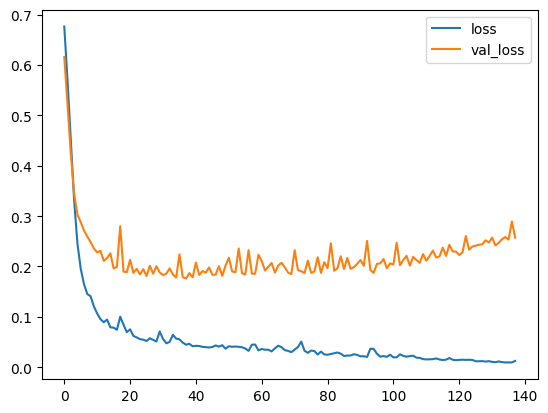

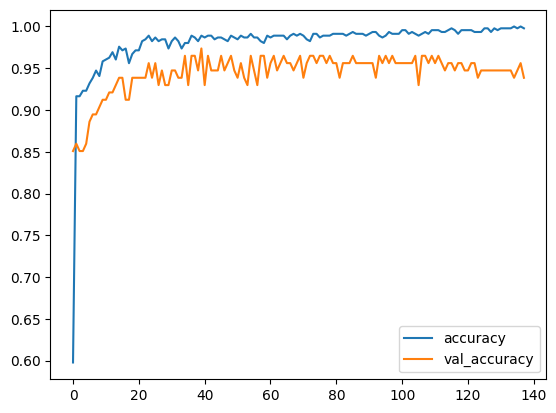

In [ ]:
plot_loss_acc(history_1)

### Dense model + normalization layer

We won't scale data for our `model_2`, instead we will include normalization layer inside our model.  

In [ ]:
normalization_layer = tf.keras.layers.Normalization()

normalization_layer.adapt(X_train)

In [ ]:
inputs = layers.Input(shape=(30,))

x = normalization_layer(inputs)

x = layers.Dense(units=64, activation='relu')(x)

x = layers.Dense(units=128, activation='relu')(x)

outputs = layers.Dense(units=1, activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs, name='model_2')

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 30)]              0         
                                                                 
 normalization_5 (Normalizat  (None, 30)               61        
 ion)                                                            
                                                                 
 dense_24 (Dense)            (None, 64)                1984      
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10,494
Trainable params: 10,433
Non-trainable params: 61
______________________________________________________

In [ ]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=100,
                                                       restore_best_weights=True)

In [ ]:
history_2 = model_2.fit(x=X_train,
                        y=y_train_encoded,
                        epochs=300,
                        validation_data=(X_test, y_test_encoded),
                        callbacks=[early_stop_callback])

Epoch 1/300
15/15 [==============================] - 1s 24ms/step - loss: 0.4176 - accuracy: 0.8703 - val_loss: 0.2250 - val_accuracy: 0.9561
Epoch 2/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1675 - accuracy: 0.9560 - val_loss: 0.1449 - val_accuracy: 0.9561
Epoch 3/300
15/15 [==============================] - 0s 6ms/step - loss: 0.1022 - accuracy: 0.9780 - val_loss: 0.1207 - val_accuracy: 0.9737
Epoch 4/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0769 - accuracy: 0.9802 - val_loss: 0.1127 - val_accuracy: 0.9649
Epoch 5/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0639 - accuracy: 0.9824 - val_loss: 0.1029 - val_accuracy: 0.9649
Epoch 6/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0552 - accuracy: 0.9868 - val_loss: 0.0976 - val_accuracy: 0.9649
Epoch 7/300
15/15 [==============================] - 0s 7ms/step - loss: 0.0497 - accuracy: 0.9890 - val_loss: 0.0995 - val_accuracy: 0.9649
Epoch 8/300


In [ ]:
model_2.evaluate(X_test, y_test_encoded)

4/4 [==============================] - 0s 4ms/step - loss: 0.0948 - accuracy: 0.9649


[0.0948377177119255, 0.9649122953414917]

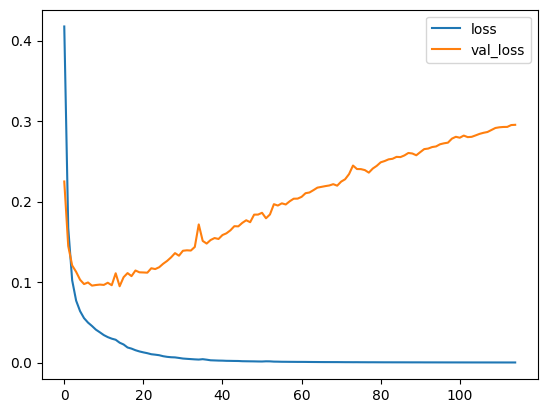

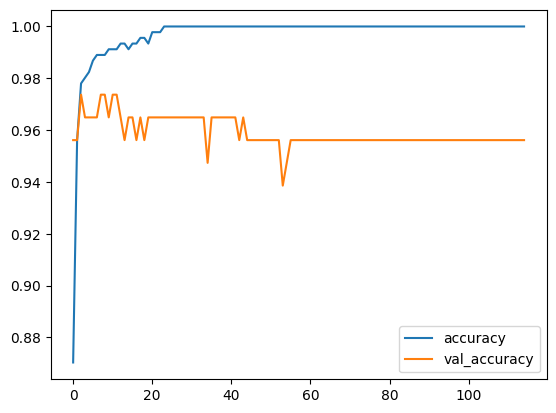

In [ ]:
plot_loss_acc(history_2)

### Dense model + normalization layer + regularization layer

Our `model_2` performs better tham `model_1` but it overfits on the train data.

In `model_3` we will lower number of parameters/weights and add regularization layer (`tf.keras.layers.Dropout`).

In [ ]:
normalization_layer = tf.keras.layers.Normalization()

normalization_layer.adapt(X_train)

In [ ]:
inputs = layers.Input(shape=(30,))

x = normalization_layer(inputs)

x = layers.Dense(units=16, activation='relu')(x)

x = layers.Dense(units=32, activation='relu')(x)

x = layers.Dropout(0.6)(x)

outputs = layers.Dense(units=1, activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs, outputs, name='model_3')

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 30)]              0         
                                                                 
 normalization_15 (Normaliza  (None, 30)               61        
 tion)                                                           
                                                                 
 dense_54 (Dense)            (None, 16)                496       
                                                                 
 dense_55 (Dense)            (None, 32)                544       
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_56 (Dense)            (None, 1)                 33        
                                                           

In [ ]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=100,
                                                       restore_best_weights=True)

In [ ]:
history_3 = model_3.fit(x=X_train,
                        y=y_train_encoded,
                        epochs=300,
                        validation_data=(X_test, y_test_encoded),
                        callbacks=[early_stop_callback])

Epoch 1/300
15/15 [==============================] - 2s 25ms/step - loss: 0.6274 - accuracy: 0.6220 - val_loss: 0.5209 - val_accuracy: 0.8246
Epoch 2/300
15/15 [==============================] - 0s 7ms/step - loss: 0.5028 - accuracy: 0.7868 - val_loss: 0.4117 - val_accuracy: 0.9474
Epoch 3/300
15/15 [==============================] - 0s 7ms/step - loss: 0.4274 - accuracy: 0.8352 - val_loss: 0.3275 - val_accuracy: 0.9737
Epoch 4/300
15/15 [==============================] - 0s 7ms/step - loss: 0.3541 - accuracy: 0.8791 - val_loss: 0.2624 - val_accuracy: 0.9737
Epoch 5/300
15/15 [==============================] - 0s 6ms/step - loss: 0.2787 - accuracy: 0.9121 - val_loss: 0.2197 - val_accuracy: 0.9737
Epoch 6/300
15/15 [==============================] - 0s 7ms/step - loss: 0.2425 - accuracy: 0.9407 - val_loss: 0.1879 - val_accuracy: 0.9737
Epoch 7/300
15/15 [==============================] - 0s 7ms/step - loss: 0.2419 - accuracy: 0.9429 - val_loss: 0.1642 - val_accuracy: 0.9737
Epoch 8/300


In [ ]:
model_3.evaluate(X_test, y_test_encoded)

4/4 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.9649


[0.09580612927675247, 0.9649122953414917]

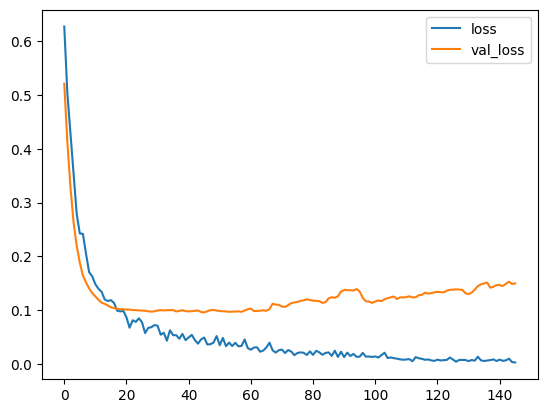

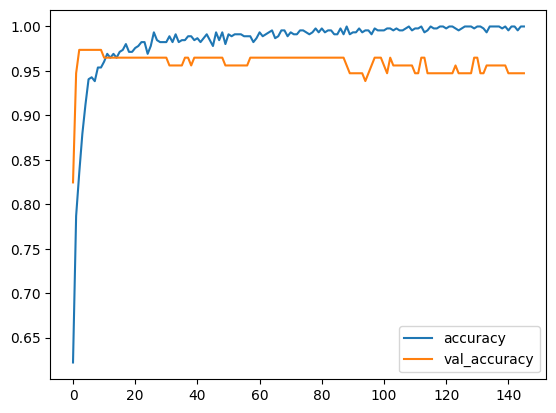

In [ ]:
plot_loss_acc(history_3)

## Test our Models



In [ ]:
def make_pred(model, features, labels, class_names, feature_type='numpy'):

  if feature_type == 'pandas':
    features = features.to_numpy()


  num = np.random.randint(0, len(features))

  feature = features[num]

  label = labels[num]

  pred_probs = model.predict(tf.expand_dims(feature, axis=0))

  pred_label = int(np.round(pred_probs))

  print(f'True Label: {class_names[label]} - {label}\nPred Label: {class_names[pred_label]} - {pred_label}')

In [ ]:
class_names

['B', 'M']

In [ ]:
make_pred(model_1, X_test_scaled, y_test_encoded, class_names)

1/1 [==============================] - 0s 20ms/step
True Label: M - 1
Pred Label: M - 1


In [ ]:
class_names_full = ['Benign', 'malignant']

In [ ]:
make_pred(model_3, X_test, y_test_encoded, class_names_full, feature_type='pandas')

1/1 [==============================] - 0s 20ms/step
True Label: malignant - 1
Pred Label: malignant - 1
